In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [32]:
df = pd.read_csv(r"C:\Users\newyo\Downloads\archive\Online Sales Data.csv")

df

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal
...,...,...,...,...,...,...,...,...,...
235,10236,2024-08-23,Home Appliances,Nespresso Vertuo Next Coffee and Espresso Maker,1,159.99,159.99,Europe,PayPal
236,10237,2024-08-24,Clothing,Nike Air Force 1 Sneakers,3,90.00,270.00,Asia,Debit Card
237,10238,2024-08-25,Books,The Handmaid's Tale by Margaret Atwood,3,10.99,32.97,North America,Credit Card
238,10239,2024-08-26,Beauty Products,Sunday Riley Luna Sleeping Night Oil,1,55.00,55.00,Europe,PayPal


In [33]:
df.shape

(240, 9)

In [34]:
df.info

<bound method DataFrame.info of      Transaction ID        Date Product Category  \
0             10001  2024-01-01      Electronics   
1             10002  2024-01-02  Home Appliances   
2             10003  2024-01-03         Clothing   
3             10004  2024-01-04            Books   
4             10005  2024-01-05  Beauty Products   
..              ...         ...              ...   
235           10236  2024-08-23  Home Appliances   
236           10237  2024-08-24         Clothing   
237           10238  2024-08-25            Books   
238           10239  2024-08-26  Beauty Products   
239           10240  2024-08-27           Sports   

                                        Product Name  Units Sold  Unit Price  \
0                                      iPhone 14 Pro           2      999.99   
1                                   Dyson V11 Vacuum           1      499.99   
2                                   Levi's 501 Jeans           3       69.99   
3                      

In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction ID,240.0,10120.500000,69.426220,10001.0,10060.750,10120.50,10180.250,10240.00
Units Sold,240.0,2.158333,1.322454,1.0,1.000,2.00,3.000,10.00
Unit Price,240.0,236.395583,429.446695,6.5,29.500,89.99,249.990,3899.99
Total Revenue,240.0,335.699375,485.804469,6.5,62.965,179.97,399.225,3899.99


<Axes: >

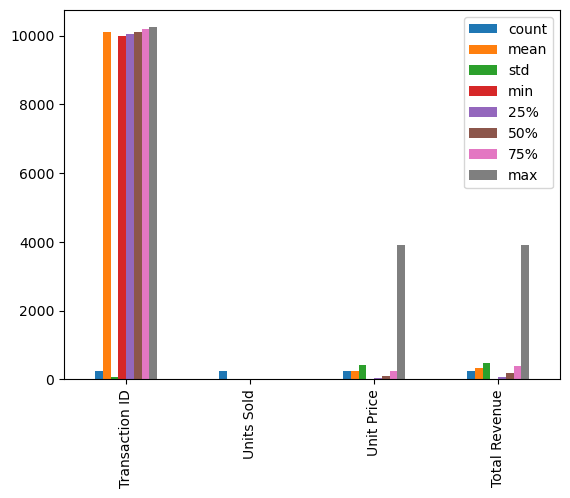

In [36]:
df.describe().T.plot(kind='bar')

In [37]:
df.isna().sum()

Transaction ID      0
Date                0
Product Category    0
Product Name        0
Units Sold          0
Unit Price          0
Total Revenue       0
Region              0
Payment Method      0
dtype: int64

In [38]:
df.duplicated().sum()

0

In [39]:
df.columns.tolist()

['Transaction ID',
 'Date',
 'Product Category',
 'Product Name',
 'Units Sold',
 'Unit Price',
 'Total Revenue',
 'Region',
 'Payment Method']

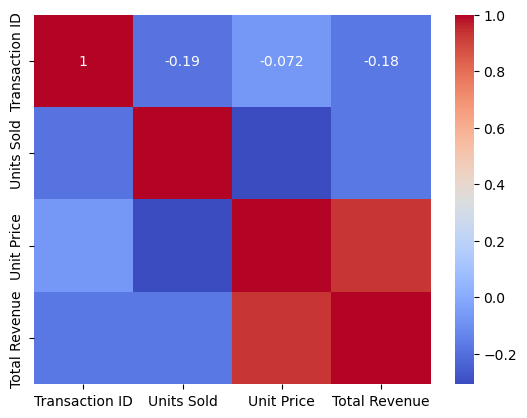

In [40]:
numeric_df = df.select_dtypes(include='number')

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Display the heatmap
plt.show()

In [41]:
df

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal
...,...,...,...,...,...,...,...,...,...
235,10236,2024-08-23,Home Appliances,Nespresso Vertuo Next Coffee and Espresso Maker,1,159.99,159.99,Europe,PayPal
236,10237,2024-08-24,Clothing,Nike Air Force 1 Sneakers,3,90.00,270.00,Asia,Debit Card
237,10238,2024-08-25,Books,The Handmaid's Tale by Margaret Atwood,3,10.99,32.97,North America,Credit Card
238,10239,2024-08-26,Beauty Products,Sunday Riley Luna Sleeping Night Oil,1,55.00,55.00,Europe,PayPal


In [42]:
df['Product Name'].nunique()

232

In [43]:
Product_count= df['Product Category'].value_counts()
Product_count

Product Category
Electronics        40
Home Appliances    40
Clothing           40
Books              40
Beauty Products    40
Sports             40
Name: count, dtype: int64

<Axes: ylabel='count'>

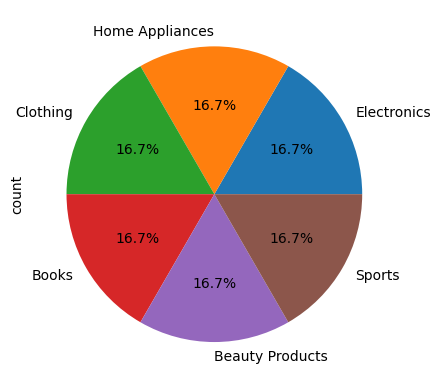

In [44]:
Product_count.plot(kind='pie', autopct='%1.1f%%')

In [45]:
df['Product Name'].unique()

array(['iPhone 14 Pro', 'Dyson V11 Vacuum', "Levi's 501 Jeans",
       'The Da Vinci Code', 'Neutrogena Skincare Set',
       'Wilson Evolution Basketball', 'MacBook Pro 16-inch',
       'Blueair Classic 480i', 'Nike Air Force 1',
       'Dune by Frank Herbert', 'Chanel No. 5 Perfume',
       'Babolat Pure Drive Tennis Racket', 'Samsung Galaxy Tab S8',
       'Keurig K-Elite Coffee Maker', 'North Face Down Jacket',
       'Salt, Fat, Acid, Heat by Samin Nosrat',
       'Dyson Supersonic Hair Dryer', 'Manduka PRO Yoga Mat',
       'Garmin Forerunner 945', 'Ninja Professional Blender',
       'Zara Summer Dress', 'Gone Girl by Gillian Flynn',
       'Olay Regenerist Face Cream', 'Adidas FIFA World Cup Football',
       'Bose QuietComfort 35 Headphones', 'Panasonic NN-SN966S Microwave',
       'Adidas Ultraboost Shoes', 'Pride and Prejudice by Jane Austen',
       'MAC Ruby Woo Lipstick', 'Nike Air Zoom Pegasus 37',
       'Sony WH-1000XM4 Headphones', 'Instant Pot Duo',
       'Under Arm

In [46]:
df[['Product Category', 'Product Name']].value_counts()

Product Category  Product Name                                    
Home Appliances   Keurig K-Elite Coffee Maker                         2
Electronics       Sony WH-1000XM4 Headphones                          2
Books             The Girl with the Dragon Tattoo by Stieg Larsson    2
                  The Catcher in the Rye by J.D. Salinger             2
                  The Silent Patient by Alex Michaelides              2
                                                                     ..
Clothing          Columbia Fleece Jacket                              1
                  Forever 21 Graphic Tee                              1
                  Gap 1969 Original Fit Jeans                         1
                  Gap Crewneck Sweatshirt                             1
Sports            Yeti Tundra Haul Portable Wheeled Cooler            1
Name: count, Length: 234, dtype: int64

In [47]:
unity=df.groupby(['Product Name', 'Units Sold']).size()
unity

Product Name                                        Units Sold
1984 by George Orwell                               4             1
Adidas 3-Stripes Shorts                             5             1
Adidas Essential Track Pants                        3             1
Adidas FIFA World Cup Football                      3             1
Adidas Originals Superstar Sneakers                 4             1
                                                                 ..
Yeti Tundra Haul Portable Wheeled Cooler            1             1
Youth to the People Superfood Antioxidant Cleanser  1             1
Zara Summer Dress                                   3             1
iPhone 14 Pro                                       2             1
iRobot Braava Jet M6                                1             1
Length: 239, dtype: int64

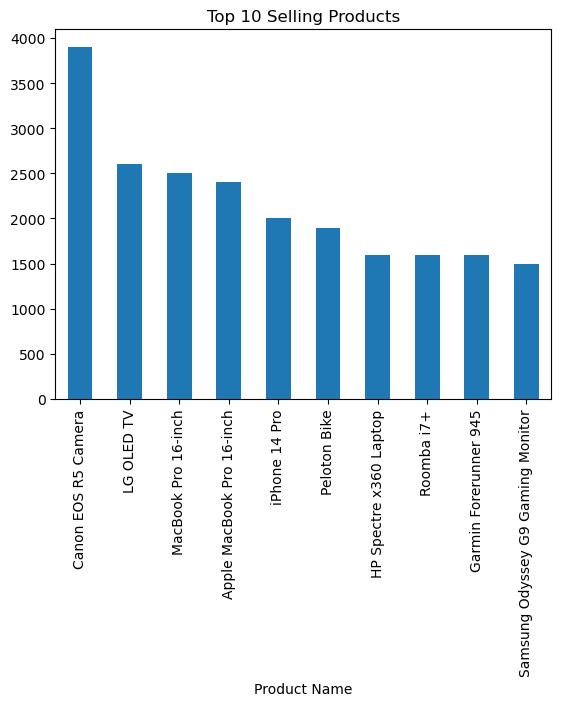

In [48]:
# Top-selling products within each category
top_selling_products = df.groupby('Product Name')['Total Revenue'].sum().sort_values(ascending=False).head(10)
top_selling_products.plot(kind='bar')
plt.title('Top 10 Selling Products')
plt.show()

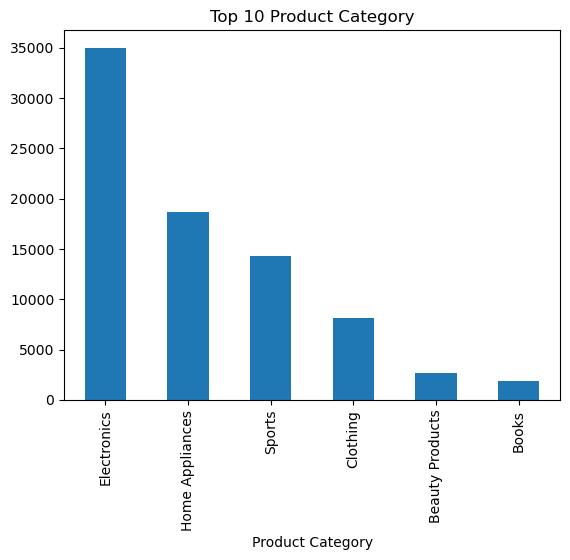

In [49]:
# Top-selling products within each category
top_selling_products = df.groupby('Product Category')['Total Revenue'].sum().sort_values(ascending=False).head(10)
top_selling_products.plot(kind='bar')
plt.title('Top 10 Product Category')
plt.show()

<Axes: xlabel='Product Name,Units Sold'>

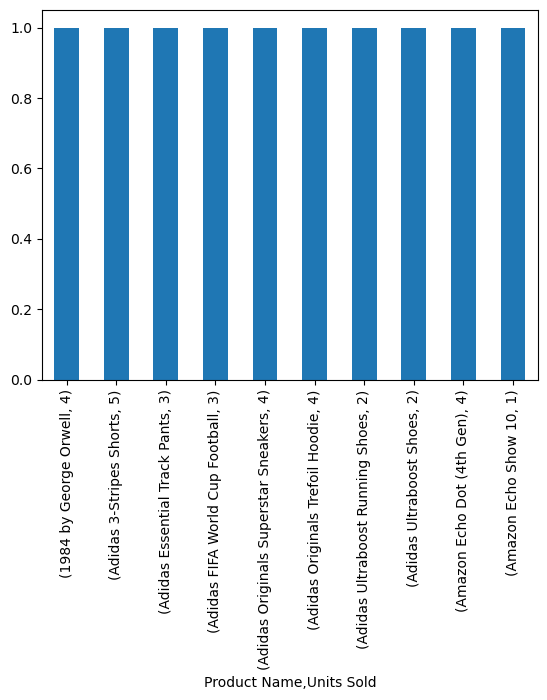

In [50]:
unity.head(10).plot(kind='bar')

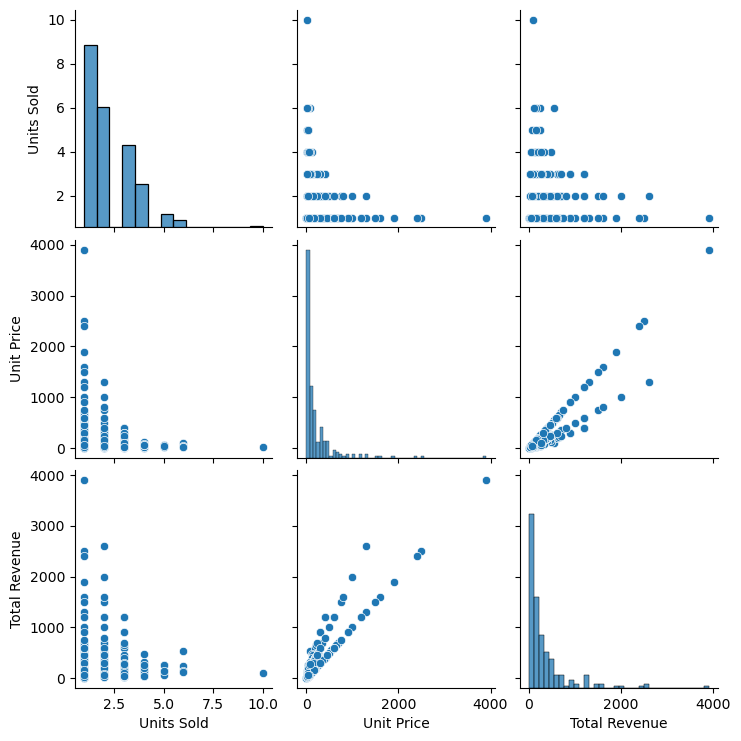

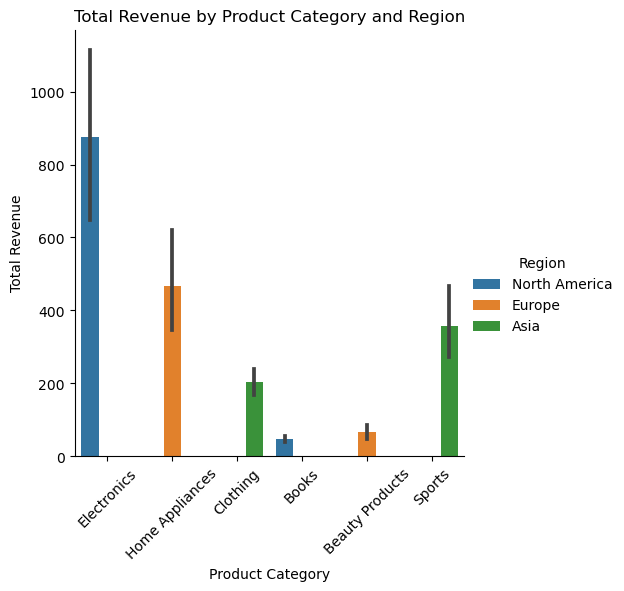

In [51]:
# Pairplot for numerical variables
sns.pairplot(df[['Units Sold', 'Unit Price', 'Total Revenue']])
plt.show()

# Total Revenue by Product Category and Region
sns.catplot(x='Product Category', y='Total Revenue', hue='Region', kind='bar', data=df)
plt.title('Total Revenue by Product Category and Region')
plt.xticks(rotation=45)
plt.show()

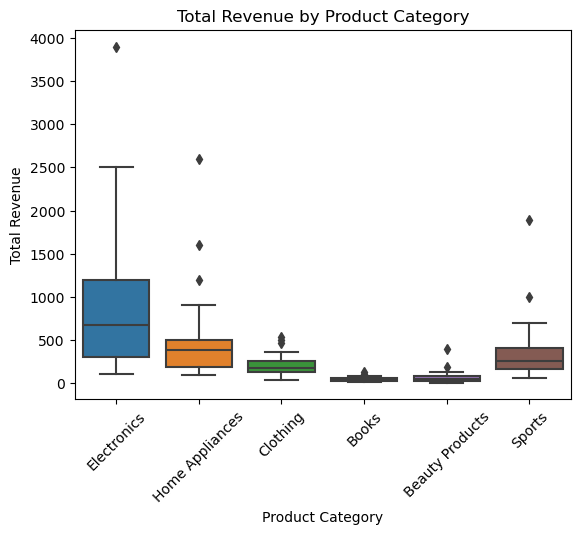

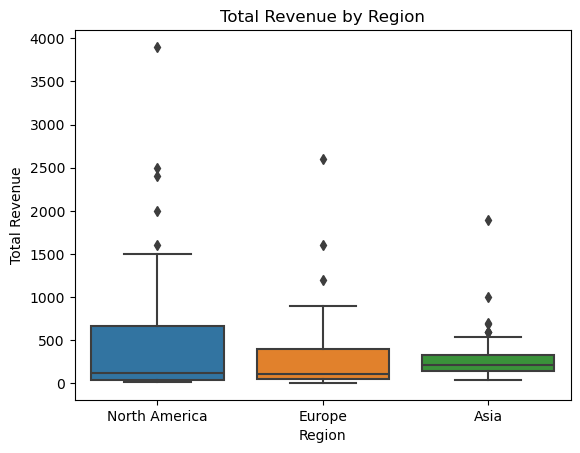

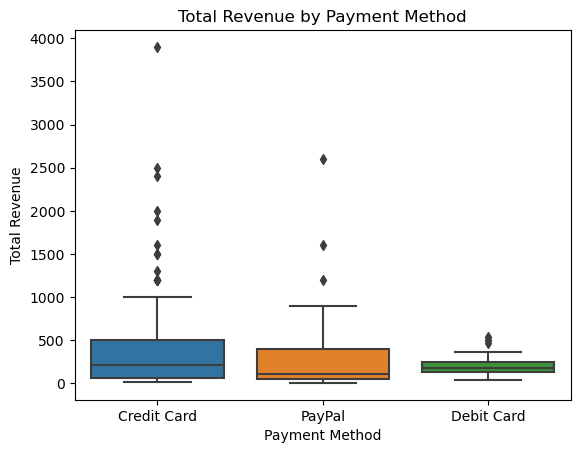

In [52]:
sns.boxplot(x='Product Category', y='Total Revenue', data=df)
plt.title('Total Revenue by Product Category')
plt.xticks(rotation=45)
plt.show()

# Total Revenue by Region
sns.boxplot(x='Region', y='Total Revenue', data=df)
plt.title('Total Revenue by Region')
plt.show()

# Total Revenue by Payment Method
sns.boxplot(x='Payment Method', y='Total Revenue', data=df)
plt.title('Total Revenue by Payment Method')
plt.show()

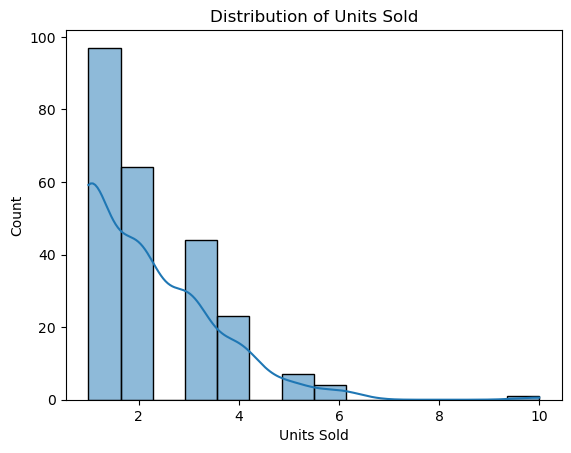

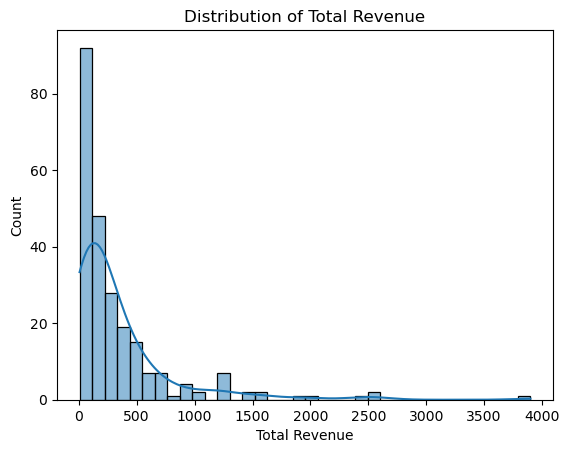

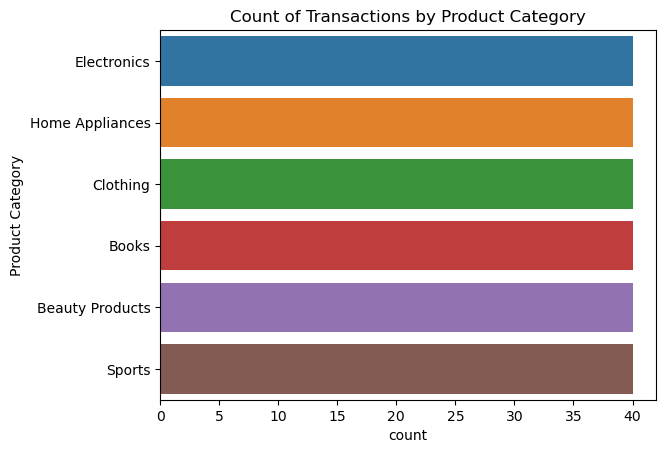

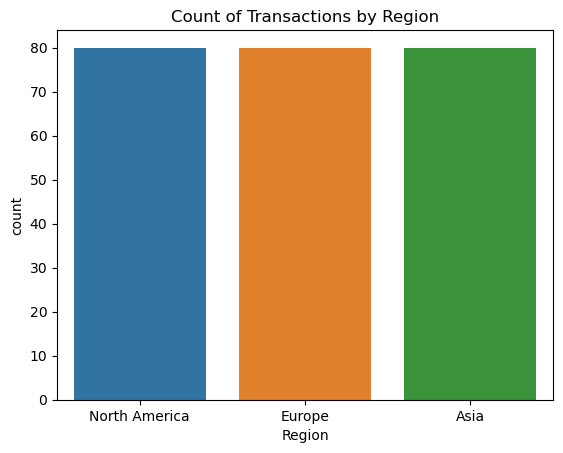

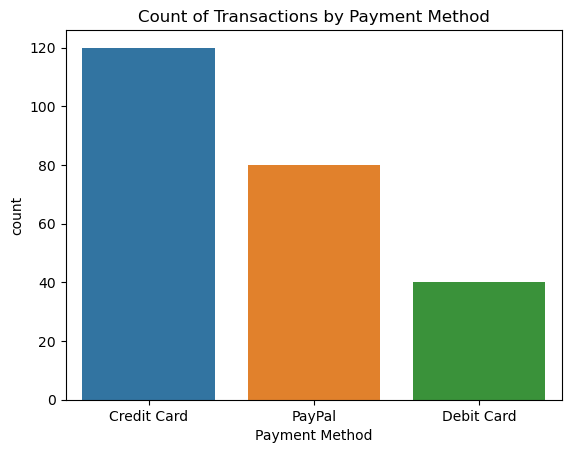

In [53]:
# Distribution of Units Sold
sns.histplot(df['Units Sold'], kde=True)
plt.title('Distribution of Units Sold')
plt.show()

# Distribution of Total Revenue
sns.histplot(df['Total Revenue'], kde=True)
plt.title('Distribution of Total Revenue')
plt.show()

# Count of Transactions by Product Category
sns.countplot(y='Product Category', data=df)
plt.title('Count of Transactions by Product Category')
plt.show()

# Count of Transactions by Region
sns.countplot(x='Region', data=df)
plt.title('Count of Transactions by Region')
plt.show()

# Count of Transactions by Payment Method
sns.countplot(x='Payment Method', data=df)
plt.title('Count of Transactions by Payment Method')
plt.show()

<Figure size 2000x2000 with 0 Axes>

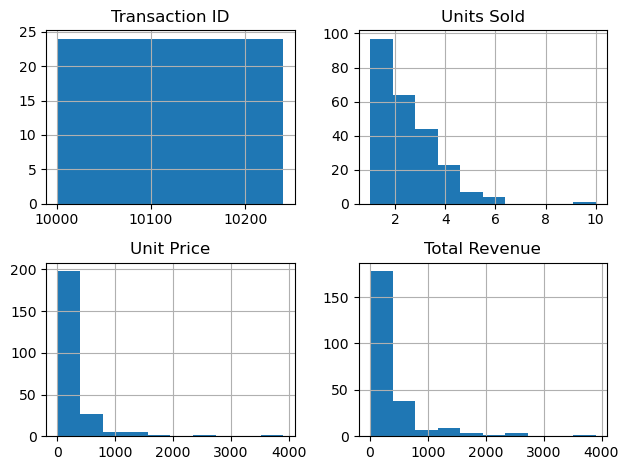

In [54]:
plt.figure(figsize=(20, 20))
df.hist()

plt.tight_layout()

plt.show()

In [55]:
df.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


In [56]:
X = df.drop('Total Revenue', axis=1)
y = df['Total Revenue']

In [57]:
X = pd.get_dummies(X)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()


model.fit(X_train, y_train)


predictions = model.predict(X_test)

In [60]:
predictions = model.predict(X_test)

In [61]:
from sklearn.metrics import r2_score, mean_squared_error


r2 = r2_score(y_test, predictions)


mse = mean_squared_error(y_test, predictions)

print(f"R-squared: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

R-squared: 0.94
Mean Squared Error: 11417.34


(-0.5, 799.5, 399.5, -0.5)

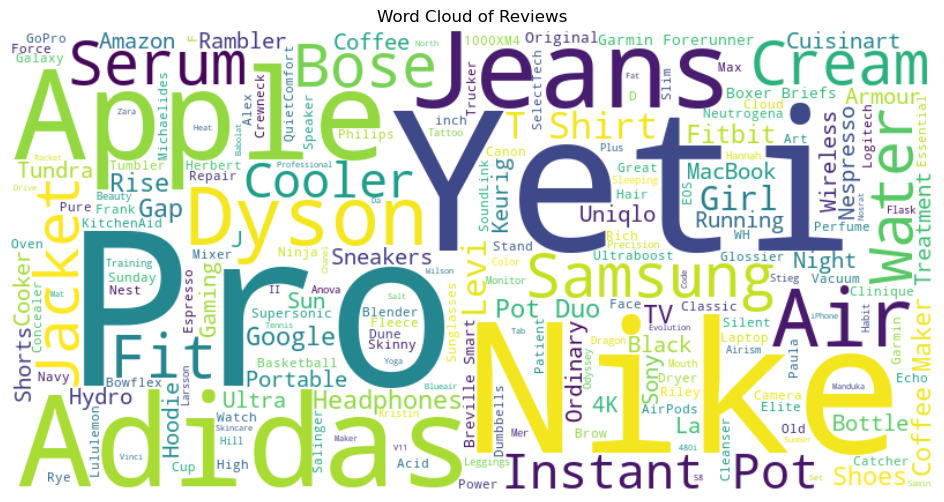

In [62]:
from wordcloud import WordCloud

reviews_text = ' '.join(df['Product Name'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(reviews_text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Reviews')
plt.axis('off')